## Clustering (cosine k-means)


In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

np.random.seed(7)
plt.style.use('seaborn-v0_8-whitegrid')


In [2]:
# Load embeddings
emb_path = Path('..') / '..' / 'embeddings' / 'mu_graph_vae_v3.npy'
mu = np.load(emb_path)

mu.shape, mu.dtype

((49125, 128), dtype('float32'))

In [3]:
scaler = StandardScaler()
mu_embeddings_normalized = scaler.fit_transform(mu)

## Clustering (K-means)


In [4]:
n_clusters = 100

## Clustering on raw centered embeddings (mu_centered)
Runs cosine k-means directly on the centered embeddings without PCA/whitening.


In [5]:
#We appy the Kmeans on the whole dataset
kmeans_before = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_before.fit(mu_embeddings_normalized)
centroids_kmeans_before = kmeans_before.cluster_centers_
labels_kmeans_before = kmeans_before.labels_

In [6]:
# Silhouette Score
silhouette_avg = silhouette_score(mu_embeddings_normalized, labels_kmeans_before)
print("Silhouette Score :", silhouette_avg)

Silhouette Score : 0.17834407


In [7]:
centroids_kmeans_before.shape

(100, 128)

## UMAP visualization (optional)
UMAP is for visualization; clustering should rely on PCA space.


In [8]:

import umap
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42, verbose=True)
Z2 = reducer.fit_transform(mu_embeddings_normalized)


/home/lucas/graph_scenarios/venv/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(n_components=3, n_jobs=1, random_state=42, verbose=True)
Tue Jan 13 13:54:38 2026 Construct fuzzy simplicial set
Tue Jan 13 13:54:38 2026 Finding Nearest Neighbors
Tue Jan 13 13:54:38 2026 Building RP forest with 16 trees
Tue Jan 13 13:54:47 2026 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Tue Jan 13 13:55:06 2026 Finished Nearest Neighbor Search
Tue Jan 13 13:55:11 2026 Construct embedding


/home/lucas/graph_scenarios/venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Jan 13 13:57:57 2026 Finished embedding


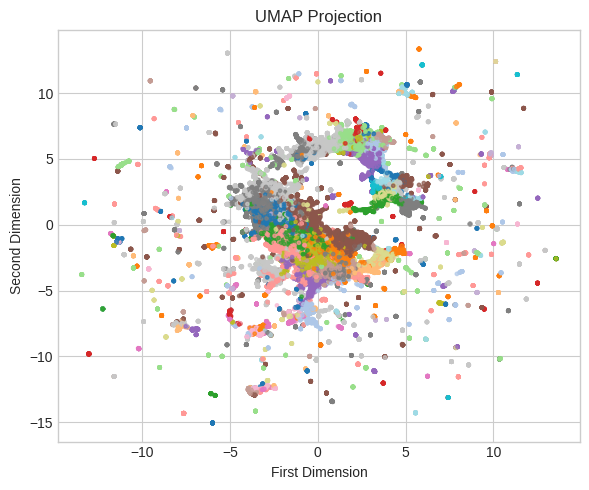

In [9]:
plt.figure(figsize=(6, 5))
plt.scatter(Z2[:, 0], Z2[:, 1], c=labels_kmeans_before, s=6, cmap='tab20', alpha=0.7)
plt.title(f'UMAP Projection')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.tight_layout()
plt.savefig(f"umap_graph_vae_{n_clusters}.png")

In [10]:
np.save(f"./centroids_graphvae_{n_clusters}", centroids_kmeans_before)